In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
%matplotlib inline

In [2]:
df = pd.read_csv('all_pomos.csv', parse_dates=[1, 2])
df = df.drop('uuid', axis='columns')

In [3]:
df.started_at = df.started_at.dt.tz_localize('UTC').dt.tz_convert('America/Bogota')
df.ended_at = df.ended_at.dt.tz_localize('UTC').dt.tz_convert('America/Bogota')
df['category'] = df.description.str.extract(r'(#\w*\b)', expand=False)

In [4]:
df['semester'] = df.started_at.dt.year.astype(str) + '-' + (((df.started_at.dt.month.astype(int) - 1) // 6) + 1).astype(str)
df.sample(10)

,started_at,ended_at,description,category,semester
3191,2018-06-01 02:37:58-05:00,2018-06-01 03:03:01-05:00,Entrega 3 #Sistémico,#Sistémico,2018-1
762,2017-04-12 14:27:16-05:00,2017-04-12 14:52:25-05:00,Entrega 2 #Datos2,#Datos2,2017-1
1474,2017-09-07 12:48:51-05:00,2017-09-07 13:13:54-05:00,SAP #Conmutación,#Conmutación,2017-2
1565,2017-09-16 22:14:38-05:00,2017-09-16 22:39:44-05:00,Parcial 2 #Estadística,#Estadística,2017-2
358,2017-02-14 22:09:59-05:00,2017-02-14 22:35:10-05:00,Estudiar para primer parcial de #Álgebra,#Álgebra,2017-1
1888,2017-10-23 16:04:02-05:00,2017-10-23 16:29:13-05:00,Proyecto #Integrador,#Integrador,2017-2
3507,2018-08-12 13:13:26-05:00,2018-08-12 13:38:33-05:00,Entrega 1 #Heurística,#Heurística,2018-2
2009,2017-11-18 17:14:19-05:00,2017-11-18 17:39:21-05:00,Practicar Algoritmia #Competitiva,#Competitiva,2017-2
1549,2017-09-16 09:25:22-05:00,2017-09-16 10:01:56-05:00,Parcial 2 #Estadística,#Estadística,2017-2
502,2017-03-12 19:05:03-05:00,2017-03-12 19:30:08-05:00,Entrega 1 #Datos2,#Datos2,2017-1


In [5]:
df.groupby(['semester', 'category']).size().sort_values(ascending=False).to_frame().iloc[:10]

0
semester category               
2017-2   #Competitiva        361
2018-1   #Competitiva        359
2017-1   #Competitiva        304
2018-2   #Competitiva        278
         #Heurística         258
2018-1   #Física             244
2018-2   #MonitoríaProd      243
2018-1   #Sistémico          192
2018-2   #Organización       186
2019-1   #TópicosTelemática  185

In [20]:
all_days = pd.date_range(df_days.index.min(), df_days.index.max(), freq='D')

Text(0,0.5,'Count of days')

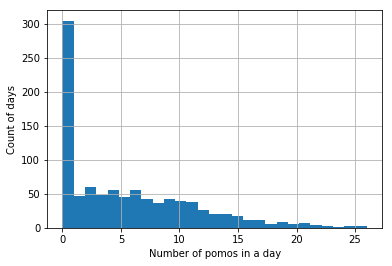

In [13]:
df_days = df.groupby(df.started_at.dt.floor('d')).size()
df_days = df_days.loc[all_days].fillna(0)
df_days.hist(bins=27)
plt.xlabel('Number of pomos in a day')
plt.ylabel('Count of days')

(0, 110)

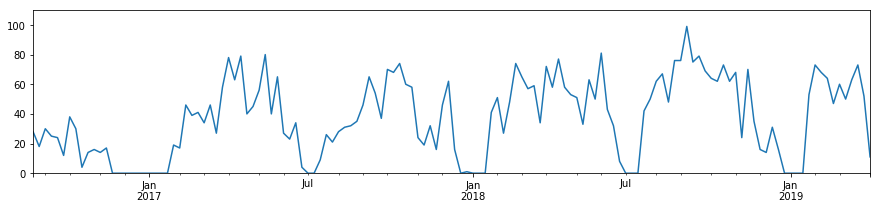

In [14]:
plt.figure(figsize=(15, 3))
df_weeks = df_days.resample('W-SUN').sum()
df_weeks.plot()
plt.ylim(0, 110)

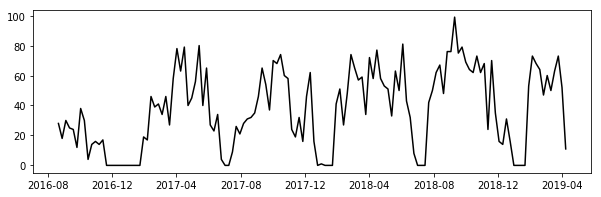

In [36]:
import numpy as np
from IPython.display import HTML

x = df_weeks.index.values
y = df_weeks.values

fig, ax = plt.subplots(figsize=(10,3))
line, = ax.plot(x, y, color='k')

In [43]:
def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    #line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=50, blit=True)
HTML(ani.to_html5_video())

In [44]:
ani.save('weekly_time_series.mp4')